In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.chdir('..')
from tscopulas.utils import *
from tscopulas.preprocessing import lag_transform as lt
os.chdir('notebooks')

In [16]:
tickers = rand_tickers(100)
dates = pd.date_range(datetime.datetime(2015, 1, 1), periods=500, freq='d')
init_prices = np.full(100, 100)
sim = simulated_brownian_motion(init_prices, dates.shape[0], mu=0.0002, sigma=0.01)
data = pd.DataFrame(sim, columns=tickers, index=dates)
data

,VACLA,UKGRE,GBAPH,VFVKA,RBBCW,BKJYD,GDQSQ,OJCHU,ESZYP,NWFFP,...,XXSEA,ORPVX,YYVCI,SIFFG,WKOPT,QTTJJ,WBQXS,LELJJ,JHBOJ,ZIEQZ
2015-01-01,98.786990,99.419362,101.056174,100.035708,100.211284,99.831816,100.787282,99.503994,100.683269,98.961190,...,99.313101,100.173111,101.910029,98.515657,100.958040,99.866303,99.498115,100.845465,99.590288,103.234210
2015-01-02,99.548242,99.671846,102.099658,99.618846,98.744251,99.735413,101.183213,99.512389,101.802154,99.256588,...,100.128944,100.328975,103.260814,98.280341,100.094611,99.992519,99.490251,99.697594,100.419287,103.792729
2015-01-03,101.031081,100.729512,102.368412,98.229508,100.126257,100.317883,100.052309,99.526905,100.396777,99.914073,...,100.683262,99.357645,102.152275,97.349748,99.469829,98.462157,100.762050,98.606900,99.170459,103.486188
2015-01-04,102.961640,100.489450,101.223652,98.646554,98.670800,101.127989,99.720875,98.255802,98.690885,98.866442,...,100.764793,101.412839,103.031078,98.250324,100.221111,97.176648,100.692656,97.036374,97.648871,103.147273
2015-01-05,104.097898,100.610151,100.080111,99.396334,99.441756,101.178008,101.147125,99.309922,100.047045,98.849197,...,101.694786,101.786145,102.191374,95.788335,100.054191,96.962754,100.450873,98.007088,97.441437,103.352786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-10,106.298320,93.506400,128.500110,131.747352,117.970301,92.755969,76.859426,96.266003,69.923284,98.139542,...,89.607557,106.261562,111.941248,96.618183,75.149983,95.620605,118.973470,119.756403,134.290928,138.989603
2016-05-11,107.207446,93.312568,127.656786,133.203445,119.434871,93.642626,77.725348,94.875778,71.260248,97.173759,...,88.722655,104.568490,111.941343,95.921251,74.910289,94.869295,120.682436,119.547480,134.198737,138.660270
2016-05-12,108.103126,92.709646,127.269527,133.878425,119.169554,94.254502,78.453282,94.416840,69.989202,97.103181,...,89.579652,105.161116,113.258436,95.523545,75.853079,95.560871,120.644393,119.528589,134.204288,137.176285
2016-05-13,107.114490,92.452032,125.531334,133.402101,117.137020,94.215925,79.546942,93.791687,68.997133,96.894092,...,90.515067,105.507895,114.859534,95.040651,75.207709,95.362549,120.887411,118.645778,135.001217,138.500561


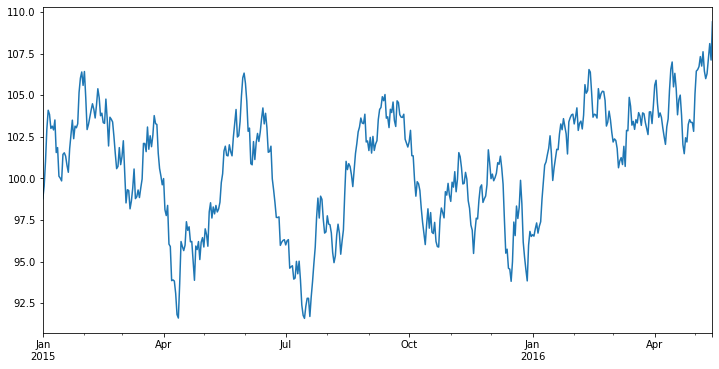

In [17]:
data.iloc[:, 0].plot(legend=False, figsize=(12, 6))
plt.show()

In [18]:
data.iloc[:, 0]

2015-01-01     98.786990
2015-01-02     99.548242
2015-01-03    101.031081
2015-01-04    102.961640
2015-01-05    104.097898
                 ...    
2016-05-10    106.298320
2016-05-11    107.207446
2016-05-12    108.103126
2016-05-13    107.114490
2016-05-14    109.408386
Freq: D, Name: VACLA, Length: 500, dtype: float64

In [22]:
lagged = lt.apply_lag_transform(data.iloc[:, 0], 3)
pd.DataFrame(lagged, columns=[f"lagged_{i}" for i in range(lagged.shape[-1])])

,lagged_0,lagged_1,lagged_2,lagged_3
0,98.786990,NaN,NaN,NaN
1,99.548242,98.786990,NaN,NaN
2,101.031081,99.548242,98.786990,NaN
3,102.961640,101.031081,99.548242,98.786990
4,104.097898,102.961640,101.031081,99.548242
...,...,...,...,...
495,106.298320,105.997640,106.455287,107.613548
496,107.207446,106.298320,105.997640,106.455287
497,108.103126,107.207446,106.298320,105.997640
498,107.114490,108.103126,107.207446,106.298320


In [21]:
pd.DataFrame(lagged)

,0,1,2,3
0,98.786990,NaN,NaN,NaN
1,99.548242,98.786990,NaN,NaN
2,101.031081,99.548242,98.786990,NaN
3,102.961640,101.031081,99.548242,98.786990
4,104.097898,102.961640,101.031081,99.548242
...,...,...,...,...
495,106.298320,105.997640,106.455287,107.613548
496,107.207446,106.298320,105.997640,106.455287
497,108.103126,107.207446,106.298320,105.997640
498,107.114490,108.103126,107.207446,106.298320


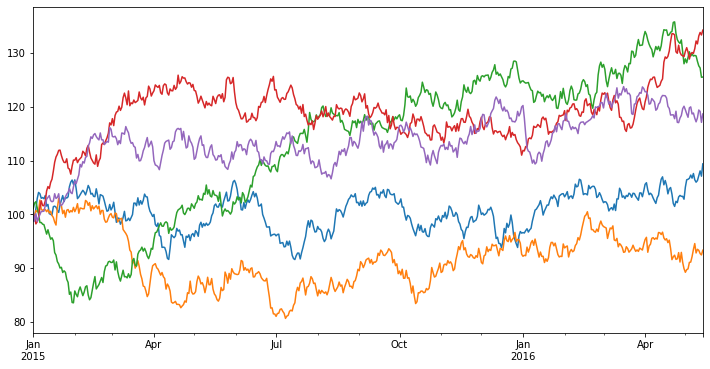

In [23]:
data.iloc[:, :5].plot(legend=False, figsize=(12, 6))
plt.show()

In [24]:
data.iloc[:, :5]

,VACLA,UKGRE,GBAPH,VFVKA,RBBCW
2015-01-01,98.786990,99.419362,101.056174,100.035708,100.211284
2015-01-02,99.548242,99.671846,102.099658,99.618846,98.744251
2015-01-03,101.031081,100.729512,102.368412,98.229508,100.126257
2015-01-04,102.961640,100.489450,101.223652,98.646554,98.670800
2015-01-05,104.097898,100.610151,100.080111,99.396334,99.441756
...,...,...,...,...,...
2016-05-10,106.298320,93.506400,128.500110,131.747352,117.970301
2016-05-11,107.207446,93.312568,127.656786,133.203445,119.434871
2016-05-12,108.103126,92.709646,127.269527,133.878425,119.169554
2016-05-13,107.114490,92.452032,125.531334,133.402101,117.137020


In [27]:
lagged_2d = lt.apply_lag_transform(data.values, 5)
print(lagged_2d.shape)
pd.DataFrame(lagged_2d[...,0], columns=data.columns, index=data.index)

(500, 100, 6)


,VACLA,UKGRE,GBAPH,VFVKA,RBBCW,BKJYD,GDQSQ,OJCHU,ESZYP,NWFFP,...,XXSEA,ORPVX,YYVCI,SIFFG,WKOPT,QTTJJ,WBQXS,LELJJ,JHBOJ,ZIEQZ
2015-01-01,98.786990,99.419362,101.056174,100.035708,100.211284,99.831816,100.787282,99.503994,100.683269,98.961190,...,99.313101,100.173111,101.910029,98.515657,100.958040,99.866303,99.498115,100.845465,99.590288,103.234210
2015-01-02,99.548242,99.671846,102.099658,99.618846,98.744251,99.735413,101.183213,99.512389,101.802154,99.256588,...,100.128944,100.328975,103.260814,98.280341,100.094611,99.992519,99.490251,99.697594,100.419287,103.792729
2015-01-03,101.031081,100.729512,102.368412,98.229508,100.126257,100.317883,100.052309,99.526905,100.396777,99.914073,...,100.683262,99.357645,102.152275,97.349748,99.469829,98.462157,100.762050,98.606900,99.170459,103.486188
2015-01-04,102.961640,100.489450,101.223652,98.646554,98.670800,101.127989,99.720875,98.255802,98.690885,98.866442,...,100.764793,101.412839,103.031078,98.250324,100.221111,97.176648,100.692656,97.036374,97.648871,103.147273
2015-01-05,104.097898,100.610151,100.080111,99.396334,99.441756,101.178008,101.147125,99.309922,100.047045,98.849197,...,101.694786,101.786145,102.191374,95.788335,100.054191,96.962754,100.450873,98.007088,97.441437,103.352786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-10,106.298320,93.506400,128.500110,131.747352,117.970301,92.755969,76.859426,96.266003,69.923284,98.139542,...,89.607557,106.261562,111.941248,96.618183,75.149983,95.620605,118.973470,119.756403,134.290928,138.989603
2016-05-11,107.207446,93.312568,127.656786,133.203445,119.434871,93.642626,77.725348,94.875778,71.260248,97.173759,...,88.722655,104.568490,111.941343,95.921251,74.910289,94.869295,120.682436,119.547480,134.198737,138.660270
2016-05-12,108.103126,92.709646,127.269527,133.878425,119.169554,94.254502,78.453282,94.416840,69.989202,97.103181,...,89.579652,105.161116,113.258436,95.523545,75.853079,95.560871,120.644393,119.528589,134.204288,137.176285
2016-05-13,107.114490,92.452032,125.531334,133.402101,117.137020,94.215925,79.546942,93.791687,68.997133,96.894092,...,90.515067,105.507895,114.859534,95.040651,75.207709,95.362549,120.887411,118.645778,135.001217,138.500561


In [28]:
pd.DataFrame(lagged_2d[...,1], columns=data.columns, index=data.index)

,VACLA,UKGRE,GBAPH,VFVKA,RBBCW,BKJYD,GDQSQ,OJCHU,ESZYP,NWFFP,...,XXSEA,ORPVX,YYVCI,SIFFG,WKOPT,QTTJJ,WBQXS,LELJJ,JHBOJ,ZIEQZ
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,98.786990,99.419362,101.056174,100.035708,100.211284,99.831816,100.787282,99.503994,100.683269,98.961190,...,99.313101,100.173111,101.910029,98.515657,100.958040,99.866303,99.498115,100.845465,99.590288,103.234210
2015-01-03,99.548242,99.671846,102.099658,99.618846,98.744251,99.735413,101.183213,99.512389,101.802154,99.256588,...,100.128944,100.328975,103.260814,98.280341,100.094611,99.992519,99.490251,99.697594,100.419287,103.792729
2015-01-04,101.031081,100.729512,102.368412,98.229508,100.126257,100.317883,100.052309,99.526905,100.396777,99.914073,...,100.683262,99.357645,102.152275,97.349748,99.469829,98.462157,100.762050,98.606900,99.170459,103.486188
2015-01-05,102.961640,100.489450,101.223652,98.646554,98.670800,101.127989,99.720875,98.255802,98.690885,98.866442,...,100.764793,101.412839,103.031078,98.250324,100.221111,97.176648,100.692656,97.036374,97.648871,103.147273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-10,105.997640,92.821258,129.519247,132.290399,117.233084,92.344703,77.950882,95.955880,69.359626,98.334065,...,89.252366,106.954910,111.089319,98.593269,75.369055,96.278495,119.214719,120.735579,135.307819,139.515943
2016-05-11,106.298320,93.506400,128.500110,131.747352,117.970301,92.755969,76.859426,96.266003,69.923284,98.139542,...,89.607557,106.261562,111.941248,96.618183,75.149983,95.620605,118.973470,119.756403,134.290928,138.989603
2016-05-12,107.207446,93.312568,127.656786,133.203445,119.434871,93.642626,77.725348,94.875778,71.260248,97.173759,...,88.722655,104.568490,111.941343,95.921251,74.910289,94.869295,120.682436,119.547480,134.198737,138.660270
2016-05-13,108.103126,92.709646,127.269527,133.878425,119.169554,94.254502,78.453282,94.416840,69.989202,97.103181,...,89.579652,105.161116,113.258436,95.523545,75.853079,95.560871,120.644393,119.528589,134.204288,137.176285


In [29]:
pd.DataFrame(lagged_2d[...,2], columns=data.columns, index=data.index)

,VACLA,UKGRE,GBAPH,VFVKA,RBBCW,BKJYD,GDQSQ,OJCHU,ESZYP,NWFFP,...,XXSEA,ORPVX,YYVCI,SIFFG,WKOPT,QTTJJ,WBQXS,LELJJ,JHBOJ,ZIEQZ
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,98.786990,99.419362,101.056174,100.035708,100.211284,99.831816,100.787282,99.503994,100.683269,98.961190,...,99.313101,100.173111,101.910029,98.515657,100.958040,99.866303,99.498115,100.845465,99.590288,103.234210
2015-01-04,99.548242,99.671846,102.099658,99.618846,98.744251,99.735413,101.183213,99.512389,101.802154,99.256588,...,100.128944,100.328975,103.260814,98.280341,100.094611,99.992519,99.490251,99.697594,100.419287,103.792729
2015-01-05,101.031081,100.729512,102.368412,98.229508,100.126257,100.317883,100.052309,99.526905,100.396777,99.914073,...,100.683262,99.357645,102.152275,97.349748,99.469829,98.462157,100.762050,98.606900,99.170459,103.486188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-10,106.455287,94.572711,129.598754,130.830241,117.934935,92.591249,77.962201,94.684328,69.411827,99.937498,...,89.343894,106.460786,112.640007,99.332572,77.054554,95.625879,117.915759,120.126512,136.280765,138.913441
2016-05-11,105.997640,92.821258,129.519247,132.290399,117.233084,92.344703,77.950882,95.955880,69.359626,98.334065,...,89.252366,106.954910,111.089319,98.593269,75.369055,96.278495,119.214719,120.735579,135.307819,139.515943
2016-05-12,106.298320,93.506400,128.500110,131.747352,117.970301,92.755969,76.859426,96.266003,69.923284,98.139542,...,89.607557,106.261562,111.941248,96.618183,75.149983,95.620605,118.973470,119.756403,134.290928,138.989603
2016-05-13,107.207446,93.312568,127.656786,133.203445,119.434871,93.642626,77.725348,94.875778,71.260248,97.173759,...,88.722655,104.568490,111.941343,95.921251,74.910289,94.869295,120.682436,119.547480,134.198737,138.660270
